# **Crear un archivo Shape a partir de coordenadas y datos traídos de un archivo CSV**

**Primero se deben importar todas las librerías a utilizar**

In [1]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt


**Luego se importan los datos captados en campo por medio del archivo csv**

In [2]:
data_sensor = pd.read_csv("data/datoshoy.txt", encoding="utf-8")


**Se muestran los primeros 5 registros para observar que todo esté correcto**

In [3]:
data_sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Muestra             597 non-null    int64  
 1    Temperatura BME    597 non-null    float64
 2    Humedad BME        597 non-null    float64
 3    Presion BME        597 non-null    float64
 4    Altitud BME        597 non-null    float64
 5    Temperatura Suelo  597 non-null    float64
 6    Humedad Suelo      597 non-null    int64  
 7   Fecha               597 non-null    object 
 8    Latitud            597 non-null    float64
 9    Longitud           597 non-null    float64
 10   Presicion GPS      597 non-null    float64
 11   Altitud GPS        597 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 56.1+ KB


In [4]:
data_sensor.head()

,Muestra,Temperatura BME,Humedad BME,Presion BME,Altitud BME,Temperatura Suelo,Humedad Suelo,Fecha,Latitud,Longitud,Presicion GPS,Altitud GPS
0,1,34.08,56.98,1010.38,23.96,43.579,4095,2022-12-13T15:19:51,10.816010,-74.170227,134.0,29.5
1,1,34.00,57.46,1010.31,24.54,35.779,4095,2022-12-13T15:19:51,10.816010,-74.170227,134.0,29.5
2,1,33.99,57.52,1010.36,24.08,35.147,4095,2022-12-13T15:19:56,10.816007,-74.170227,134.0,30.9
3,1,33.97,57.85,1010.39,23.86,36.208,4095,2022-12-13T15:19:56,10.816007,-74.170227,134.0,30.9
4,1,33.97,57.40,1010.43,23.48,36.364,4095,2022-12-13T15:20:01,10.816012,-74.170235,390.0,28.2


Se eliminan los espacios en blanco al inicio y al final de los nombres de las columnas

In [5]:
columnas_old = data_sensor.columns
columnas_new = {}
for i in columnas_old:
    columnas_new[i] = i.strip()


In [6]:
data_sensor.rename(columns=columnas_new,
                   inplace=True)

Eliminar las filas que tengan 0 en temperatura del suelo

In [7]:
data_sensor = data_sensor.drop(
    data_sensor[data_sensor['Temperatura Suelo'] == 0].index)


In [8]:
data_sensor.describe()

,Muestra,Temperatura BME,Humedad BME,Presion BME,Altitud BME,Temperatura Suelo,Humedad Suelo,Latitud,Longitud,Presicion GPS,Altitud GPS
count,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000
mean,54.128162,35.174452,58.200725,1009.841771,28.416543,31.601074,1575.652614,10.816017,-74.170257,99.913997,23.684486
std,28.957047,1.582571,3.195551,0.507717,4.240435,2.116084,887.248773,0.000104,0.000090,22.915924,5.362463
min,1.000000,33.120000,46.790000,1008.890000,21.530000,28.768000,682.000000,10.815844,-74.170433,79.000000,3.300000
25%,31.000000,34.160000,56.570000,1009.440000,24.650000,30.339000,978.000000,10.815916,-74.170334,86.000000,20.500000
50%,56.000000,34.730000,58.330000,1009.870000,28.150000,31.023000,1217.000000,10.816025,-74.170258,91.000000,22.900000
75%,80.000000,35.750000,60.150000,1010.290000,31.780000,32.431000,1903.000000,10.816127,-74.170181,109.000000,26.800000
max,100.000000,41.140000,66.840000,1010.670000,36.380000,54.119000,4095.000000,10.816185,-74.170097,390.000000,44.200000


Elimina los datos que estén por arriba y por debajo de 3 desviaciones estandar

In [20]:
columnas_validas = ["Latitud", "Longitud", "Fecha",
                    "Muestra", "Presicion GPS", "Altitud GPS", "geometry"]
for col in data_sensor.columns:
    if not (col in columnas_validas):
        data_sensor = data_sensor.drop(
            data_sensor[data_sensor[col] > data_sensor[col].mean() + 3*data_sensor[col].std()].index)
        data_sensor = data_sensor.drop(
            data_sensor[data_sensor[col] < data_sensor[col].mean() - 3*data_sensor[col].std()].index)


In [25]:
data_sensor.describe()

,Muestra,Temperatura BME,Humedad BME,Presion BME,Altitud BME,Temperatura Suelo,Humedad Suelo,Latitud,Longitud,Presicion GPS,Altitud GPS
count,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000
mean,56.990403,34.913532,58.427217,1009.794395,28.812015,31.149232,1333.190019,10.816016,-74.170250,97.097889,23.429559
std,28.830638,1.155175,2.635980,0.511209,4.269752,1.331720,535.339670,0.000110,0.000092,16.687398,5.219215
min,1.000000,33.130000,50.920000,1008.890000,21.530000,28.768000,682.000000,10.815844,-74.170433,79.000000,3.300000
25%,34.000000,34.050000,56.630000,1009.410000,25.130000,30.214000,944.000000,10.815909,-74.170319,86.000000,20.500000
50%,59.000000,34.650000,58.380000,1009.790000,28.890000,30.827000,1182.000000,10.816022,-74.170250,90.000000,22.800000
75%,82.000000,35.550000,60.040000,1010.240000,32.040000,32.068000,1424.000000,10.816131,-74.170174,103.000000,26.100000
max,100.000000,38.460000,65.440000,1010.670000,36.380000,35.549000,3200.000000,10.816185,-74.170097,156.000000,44.200000


**Se crea el DataFrame con los datos captados en campo**
-----------------
Un ``GeoDataFrame`` es un objeto de Pandas que tiene una columna especial que contiene objetos de geometría. El ``GeoDataFrame`` se puede crear de varias formas, pero la forma más fácil es a partir de un ``DataFrame`` existente que contiene una o más columnas con datos de geometría.

Se asigna el nombre de las columnas, entre las cuales están los sensores y las coordenadas. Luego se asignan los datos de las columnas a las variables correspondientes, del archivo .csv

Se utiliza ``points_from_xy()`` para transformar la latitud y la longitud dentro de un punto a Shape.
Con ``GeoDataFrame()`` se crea el GeoDataFrame con los datos captados en campo a partir de la geometría de los puntos Shape.

In [11]:
gdf = geopandas.GeoDataFrame(
    data_sensor, geometry=geopandas.points_from_xy(data_sensor.Longitud, data_sensor.Latitud)
)


Se imprimen los primeros 5 registros para observar que todo esté correcto.

In [12]:
print(gdf.head())

    Muestra  Temperatura BME  Humedad BME  Presion BME  Altitud BME  \
6         1            35.52        58.38      1010.56        22.43   
7         1            35.62        57.33      1010.53        22.64   
8         1            35.62        56.87      1010.56        22.42   
9         1            35.63        56.68      1010.57        22.30   
10        1            35.56        57.32      1010.55        22.47   

    Temperatura Suelo  Humedad Suelo                Fecha    Latitud  \
6              32.847            983  2022-12-13T15:22:38  10.816000   
7              32.841            925  2022-12-13T15:22:38  10.816000   
8              32.694           1040  2022-12-13T15:22:43  10.816005   
9              32.879           1051  2022-12-13T15:22:43  10.816005   
10             32.880           1071  2022-12-13T15:22:48  10.816010   

     Longitud  Presicion GPS  Altitud GPS                    geometry  
6  -74.170296           95.0         20.5  POINT (-74.17030 10.81600

**Integración con el Sistema de Referencia de Coordenadas (SRC) WGS84 EPSG:4326**
-----------------
Ya el archivo ``dgf`` es un GeoDataFrame, pero, no tiene un sistema de referencia de coordenadas (SRC) asignado. El cual es necesario, ya que, si se desa proyectar dentro de un mapa, esta proyección es utilizada para cargar la información. Para asignar un SRC, se utiliza ``set_crs()``.

In [13]:
gdf = geopandas.GeoDataFrame(gdf, geometry='geometry')
gdf = gdf.set_crs("EPSG:4326")
gdf.crs


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot: >

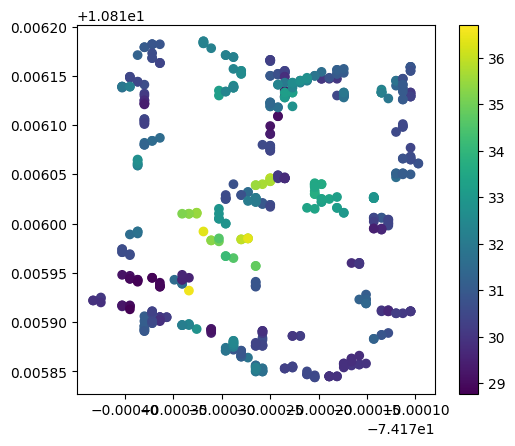

In [14]:
gdf = gdf.set_geometry("geometry")
gdf.plot("Temperatura Suelo", legend=True)

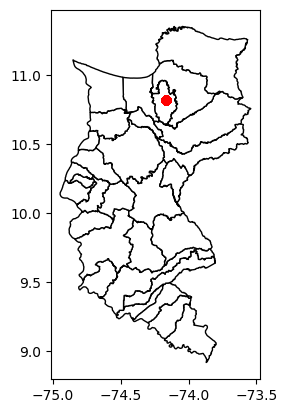

In [15]:
# Se carga el mapa de Magdalena
magdalena = "data/Magdalena/Magdalena_municipios.shp"

# Se lee el archvio
mapa_magdalena = geopandas.read_file(magdalena)

mapa_magdalena = mapa_magdalena.set_geometry("geometry")
mapa_magdalena = mapa_magdalena.to_crs("EPSG:4326")

ax = mapa_magdalena.plot(
    color='white', edgecolor='black')

gdf.plot(ax=ax, color='red')

plt.show()

In [19]:
gdf.explore("Temperatura Suelo", legend=True)

# **Exportar el shape creado a partir de los datos captados en campo**

In [17]:
gdf.to_file("data/salida_campo2.shp")

C:\Users\Migue Polo\AppData\Local\Temp\ipykernel_20644\1450064116.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file("data/salida_campo2.shp")


# **Mapas de calor**

In [18]:
import folium
from folium import plugins

map = folium.Map(location=[10.5, -74], tiles="Cartodb dark_matter", zoom_start=10)

heat_data = [[point.xy[1][0], point.xy[0][0]] for point in gdf.geometry]

heat_data
plugins.HeatMap(heat_data).add_to(map)

map